<a href="https://colab.research.google.com/github/mangoseeds/machine-learning/blob/main/8_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다
  * ...

In [2]:
 import pandas as pd
 import numpy as np
 import graphviz #tree 그리기
 import multiprocessing
 import matplotlib.pyplot as plt
 plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 와인 데이터

In [6]:
wine = load_wine()

In [7]:
wine_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['Target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 유방암 데이터

In [8]:
cancer = load_breast_cancer()

In [9]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 회귀를 위한 데이터

### 캘리포니아 주택 가격 데이터

In [14]:
california = fetch_california_housing()

In [15]:
california_df = pd.DataFrame(data = california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 당뇨병 데이터

In [16]:
diabetes = load_diabetes()

In [17]:
diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df['Target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## 분류 - `DecisionTreeClassifier()`

* `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
* 두개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [18]:
X = [[0, 0], [1, 1]]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model = model.fit(X, y)

In [19]:
model.predict([[2., 2.]])

array([1])

In [20]:
model.predict_proba([[2., 2.]]) #확률을 결과로 줌

array([[0., 1.]])

### 붓꽃 데이터 학습

#### 교차검증

##### 전처리 없이 학습

In [21]:
model = DecisionTreeClassifier()

In [22]:
cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [23]:
model = make_pipeline(
    StandardScaler(), #전처리
    DecisionTreeClassifier()
)

In [24]:
cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### 학습된 결정 트리 시각화

In [25]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [26]:
#트리 그려보기: 선택 시각화
r = tree.export_text(decision_tree = model,
                     feature_names = iris.feature_names)
print(r) 

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

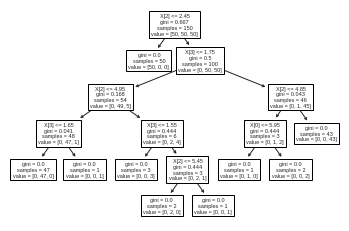

In [27]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

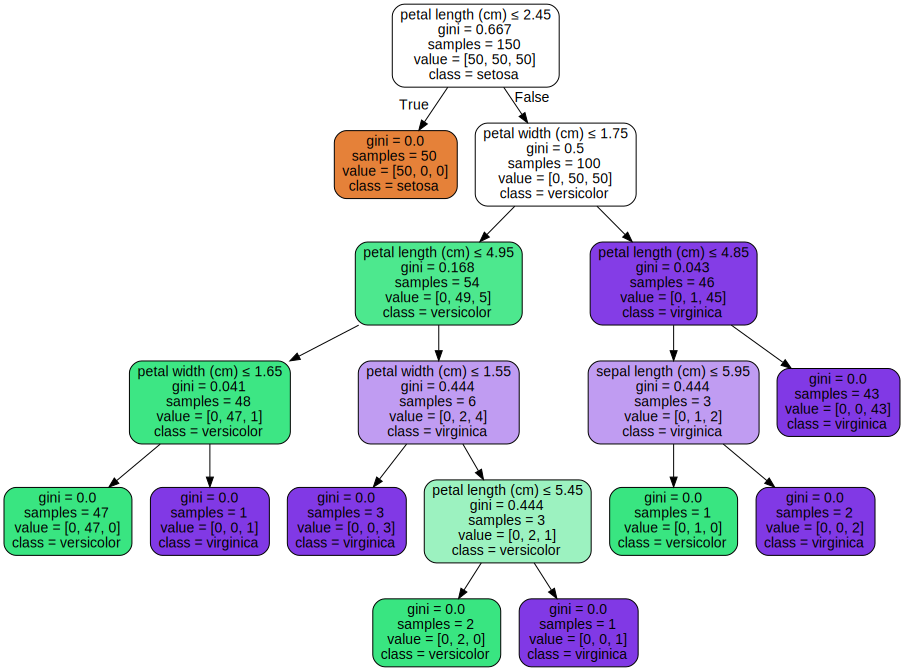

In [28]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [29]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

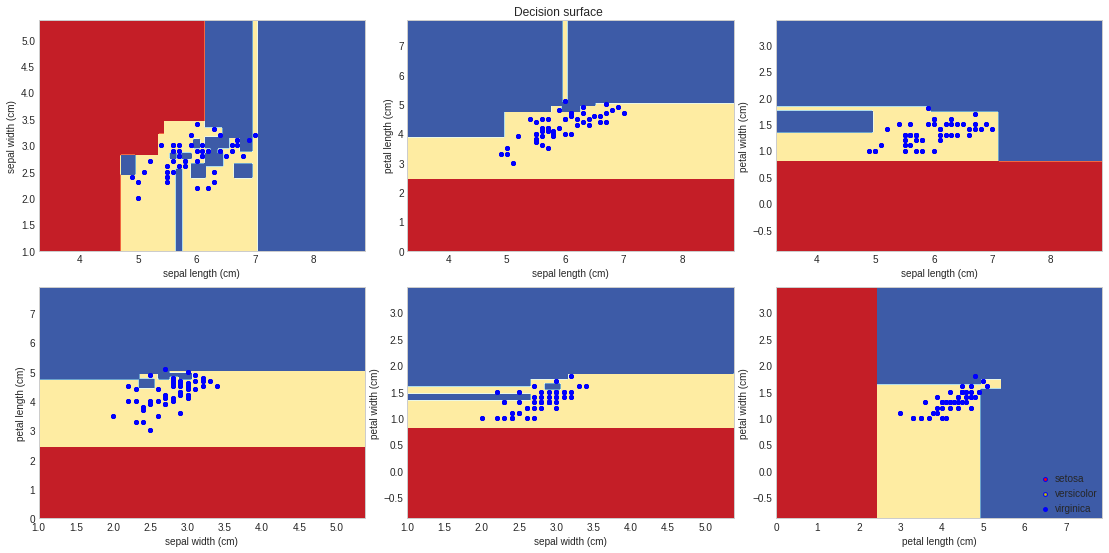

In [30]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
  X = iris.data[:, pair]
  y = iris.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

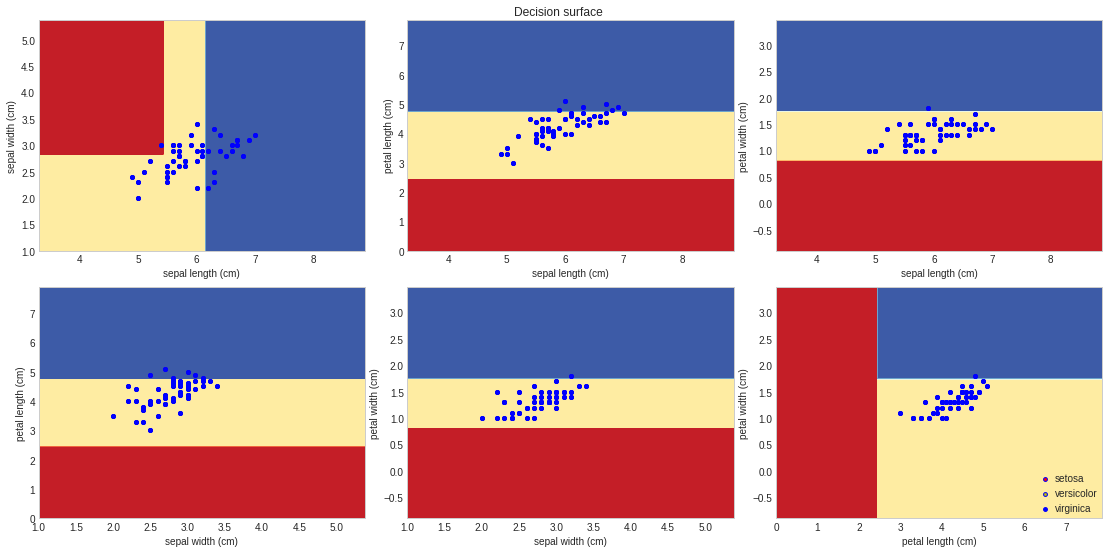

In [31]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
  X = iris.data[:, pair]
  y = iris.target

  model = DecisionTreeClassifier(max_depth = 2) #위와 다르게 depth에 제한을 줌 (오버피팅 제한)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [32]:
model = DecisionTreeClassifier()

In [33]:
cross_val_score(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.94444444, 0.80555556, 0.86111111, 0.91428571, 0.85714286])

##### 전처리 후 학습

In [34]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [35]:
cross_val_score(
    estimator = model,
    X = wine.data, y = wine.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)
#again, not a big difference 

array([0.88888889, 0.83333333, 0.94444444, 0.91428571, 0.85714286])

#### 학습된 결정 트리 시각화

In [36]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [37]:
r = tree.export_text(decision_tree = model,
                     feature_names = wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- alcohol <= 13.51
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.51
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- proline <= 655.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- proline >  655.00
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |

##### plot_tree를 사용한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.4210

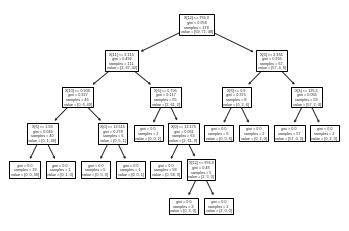

In [38]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

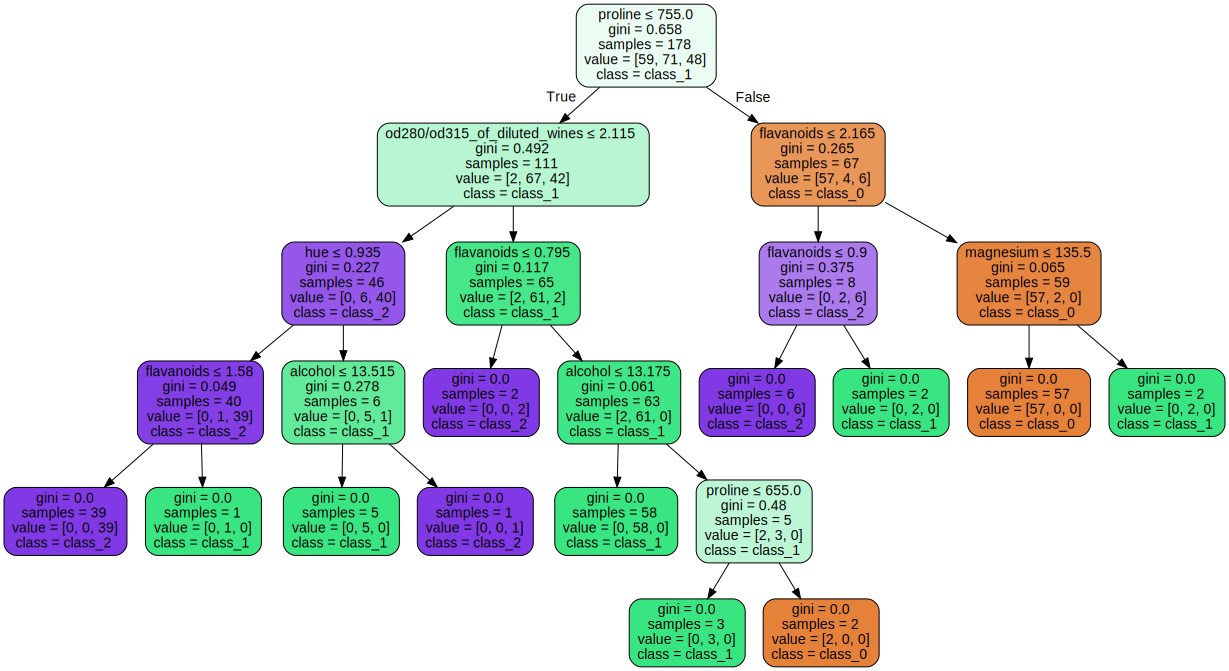

In [39]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names = wine.feature_names,
                                class_names = wine.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [40]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

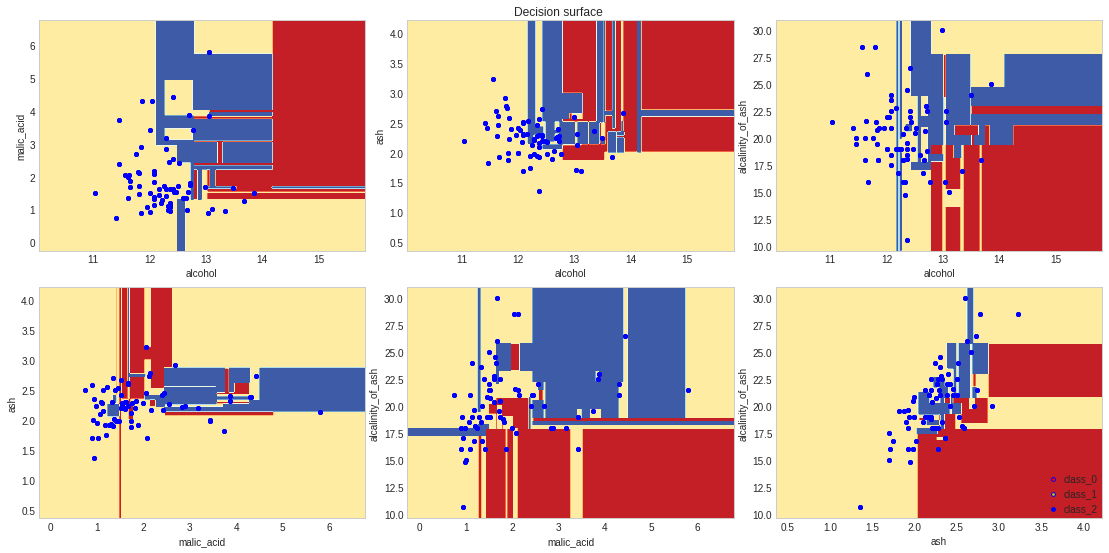

In [41]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
  X = wine.data[:, pair]
  y = wine.target

  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = wine.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

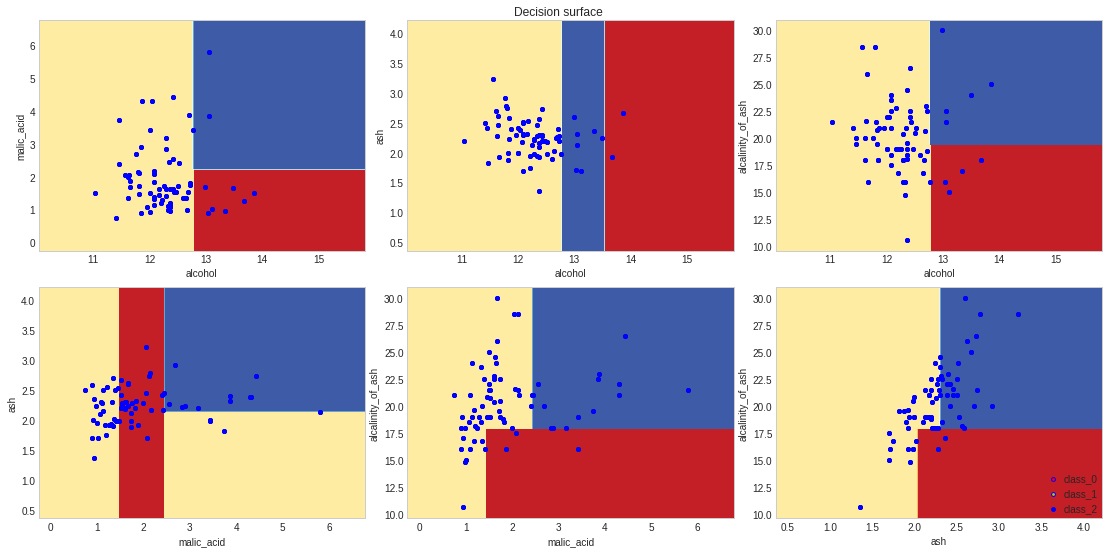

In [42]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                                [1,2], [1,3], [2,3]]):
  X = wine.data[:, pair]
  y = wine.target

  #경계가 많으면 generalization에 문제가 있음
  model = DecisionTreeClassifier(max_depth = 2) #depth에 제한을 줌 (오버피팅 제한)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = wine.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [43]:
model = DecisionTreeClassifier()

In [44]:
cross_val_score(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.9122807 , 0.92105263, 0.92105263, 0.94736842, 0.89380531])

##### 전처리 후 학습

In [45]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [46]:
cross_val_score(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.9122807 , 0.92105263, 0.92105263, 0.92982456, 0.89380531])

#### 학습된 결정 트리 시각화

In [47]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [48]:
 r = tree.export_text(decision_tree = model)
 print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_12 <= 6.60
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_21 <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_13 <= 39.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  39.15
|   |   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |   |--- class: 1
|   |

##### plot_tree를 사용한 시각화

[Text(0.625, 0.9375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'X[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'X[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'X[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'g

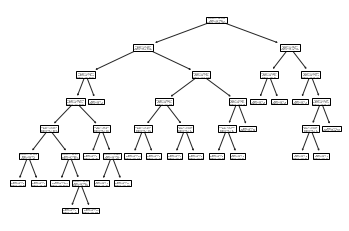

In [49]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

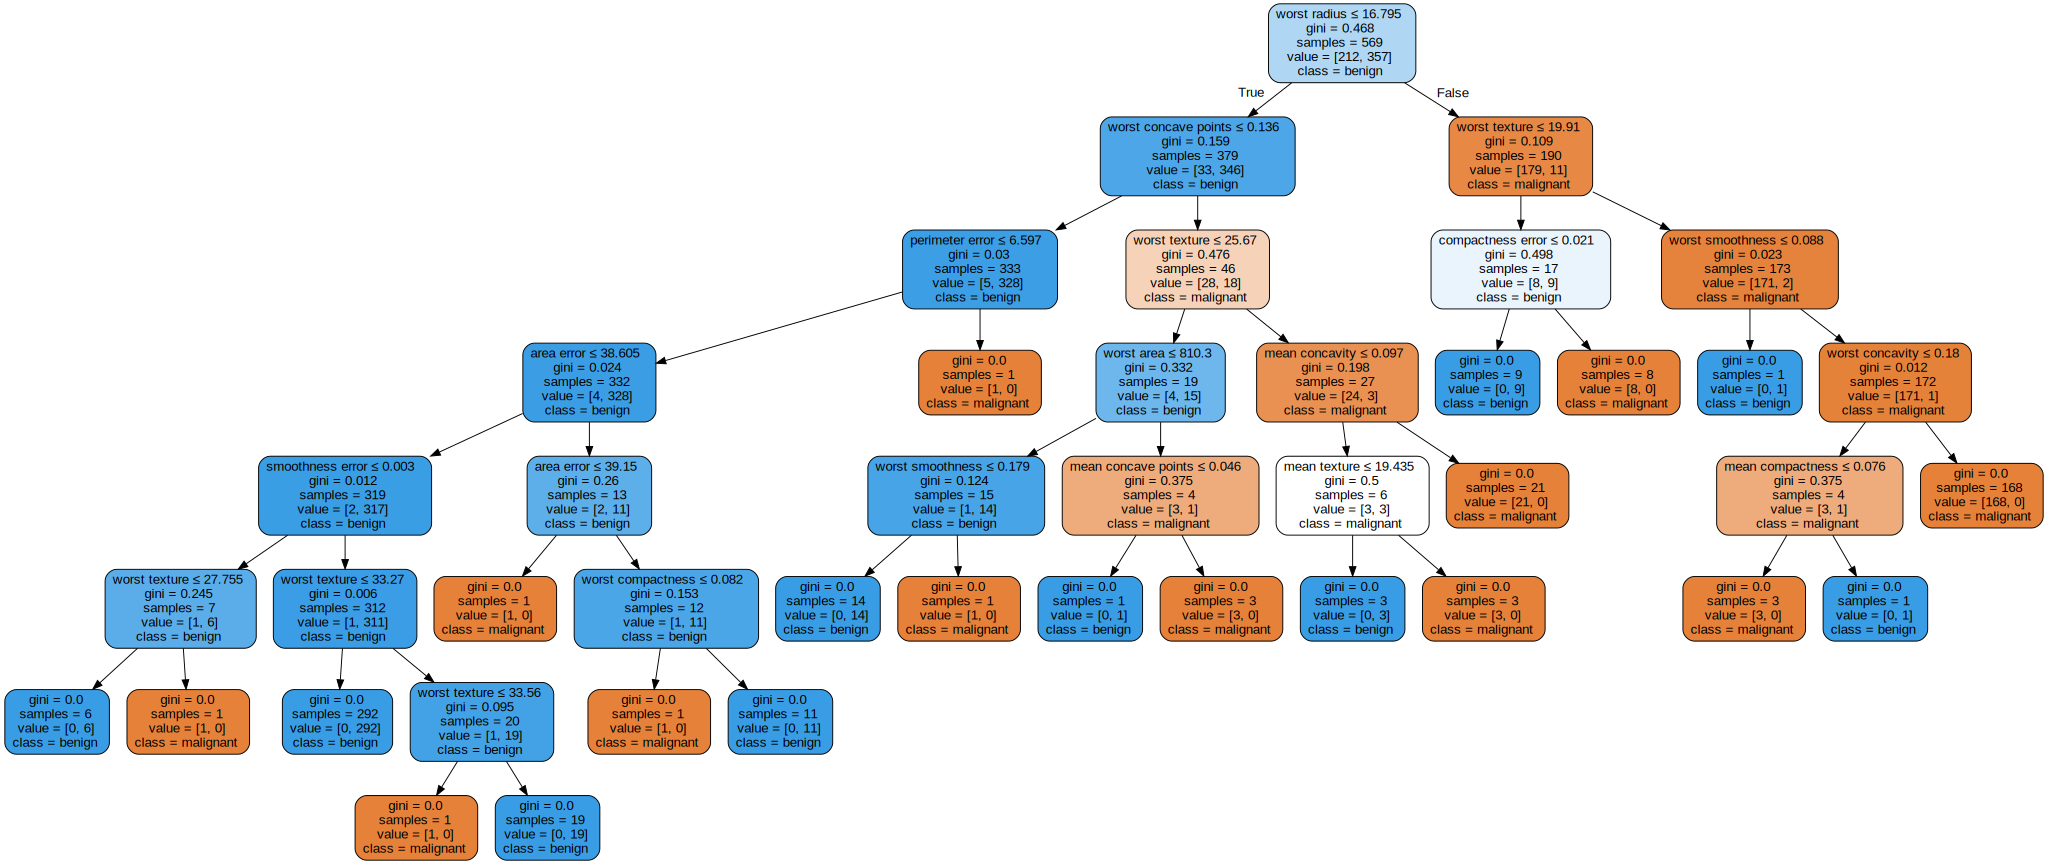

In [50]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [51]:
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

##### 결정 경계 시각화

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

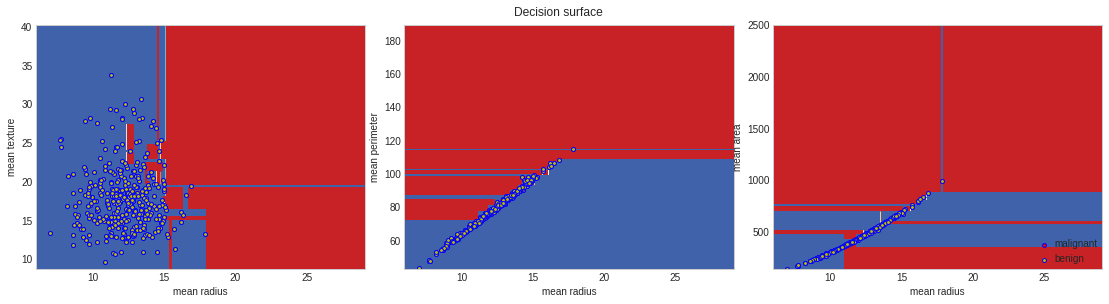

In [52]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  #경계가 많으면 generalization에 문제가 있음
  model = DecisionTreeClassifier() #depth에 제한을 줌 (오버피팅 제한)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = cancer.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(5.981, 29.10099999999951, 142.5, 2501.980000001207)

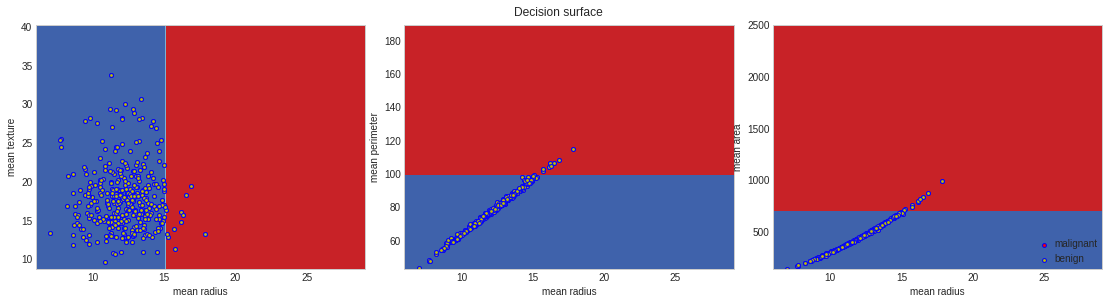

In [53]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  #경계가 많으면 generalization에 문제가 있음
  model = DecisionTreeClassifier(max_depth = 2) #depth에 제한을 줌 (오버피팅 제한)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx + 1) #subplot마다 어떤 경계를 나타내는지가 트리의 형성 기준이 되는 시각적 정보

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == 1)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = cancer.target_names[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'b', s = 15)

plt.suptitle('Decision surface')
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [54]:
model = DecisionTreeRegressor()

In [55]:
cross_val_score(
    estimator = model,
    X = california.data, y = california.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.27285765, 0.4208787 , 0.43614428, 0.2040239 , 0.4139614 ])

##### 전처리 후 학습

In [56]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [57]:
cross_val_score(
    estimator = model,
    X = california.data, y = california.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.25870035, 0.34950531, 0.41978948, 0.2112527 , 0.42248199])

#### 학습된 결정 트리 시각화

In [58]:
model = DecisionTreeRegressor()
model.fit(california.data, california.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [59]:
# print(tree.export_text(model))

##### plot_tree를 사용한 시각화

In [60]:
# tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [61]:
# #과적합 됨 (depth 너무 큼), 근데 결과도 안좋음

# dot_data = tree.export_graphviz(decision_tree = model,
#                                 feature_names = california.feature_names,
#                                 filled = True, rounded = True,
#                                 special_characters = True)
# graph = graphviz.Source(dot_data)
# graph

#### 시각화

##### 회귀식 시각화

In [62]:
# plt.figure(figsize = (16,8))

# for pairidx, pair in enumerate([0,1,2]):
#   X = california.data[:, pair].reshape(-1, 1)
#   y = california.target

#   model = DecisionTreeRegressor()
#   model.fit(X, y)

#   X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
#   predict = model.predict(X_test)

#   plt.subplot(1, 3, pairidx + 1)
#   plt.scatter(X, y, s = 20, edgecolors = 'k',
#               c = 'darkorange', label = 'data')
#   plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
#   plt.xlabel(california.feature_names[pair])
#   plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

In [63]:
# plt.figure(figsize = (16,8))

# for pairidx, pair in enumerate([0,1,2]):
#   X = california.data[:, pair].reshape(-1, 1)
#   y = california.target

#   model = DecisionTreeRegressor(max_depth = 3) #깊이 한계 주기
#   model.fit(X, y)

#   X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
#   predict = model.predict(X_test)

#   plt.subplot(1, 3, pairidx + 1)
#   plt.scatter(X, y, s = 20, edgecolors = 'k',
#               c = 'darkorange', label = 'data')
#   plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
#   plt.xlabel(california.feature_names[pair])
#   plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [64]:
model = DecisionTreeRegressor()

In [65]:
cross_val_score(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([-0.27920863, -0.1080757 , -0.04503552, -0.03671746, -0.15458557])

##### 전처리 후 학습

In [66]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [67]:
cross_val_score(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv = 5,
    n_jobs = multiprocessing.cpu_count()
)

array([-0.36338496, -0.08320563, -0.14022296,  0.09516416, -0.17700126])

#### 학습된 결정 트리 시각화

In [68]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [69]:
print(tree.export_text(model, feature_names= diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s1 <= 0.06
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.03
|   |   |   |   |   |   |   |   |   |   |--- s2 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s2 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- s6 >  -0.03
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- s1 <= -0.04
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   |

##### plot_tree를 사용한 시각화

[Text(0.5316359438742988, 0.9761904761904762, 'X[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(0.30755792644059154, 0.9285714285714286, 'X[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(0.20939173253442123, 0.8809523809523809, 'X[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(0.12076109127995921, 0.8333333333333334, 'X[4] <= 0.063\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(0.0938934217236104, 0.7857142857142857, 'X[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(0.04627740948495666, 0.7380952380952381, 'X[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(0.02702702702702703, 0.6904761904761905, 'X[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(0.01223865374808771, 0.6428571428571429, 'X[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(0.010198878123406425,

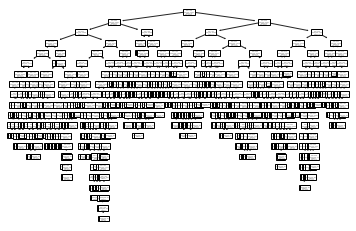

In [70]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

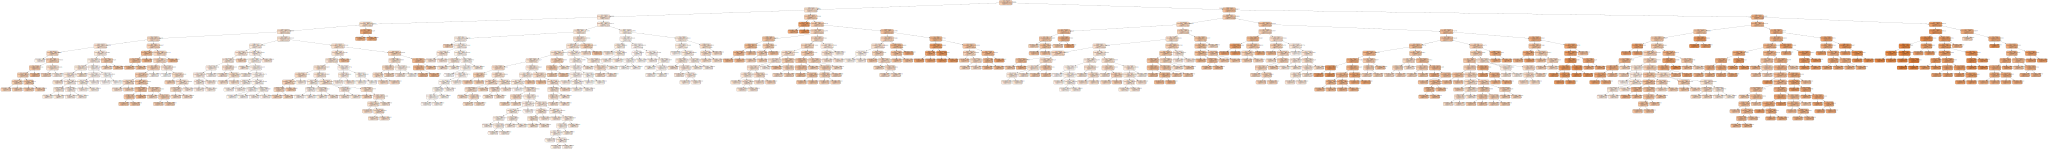

In [71]:
dot_data = tree.export_graphviz(decision_tree = model,
                                feature_names = diabetes.feature_names,
                                filled = True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

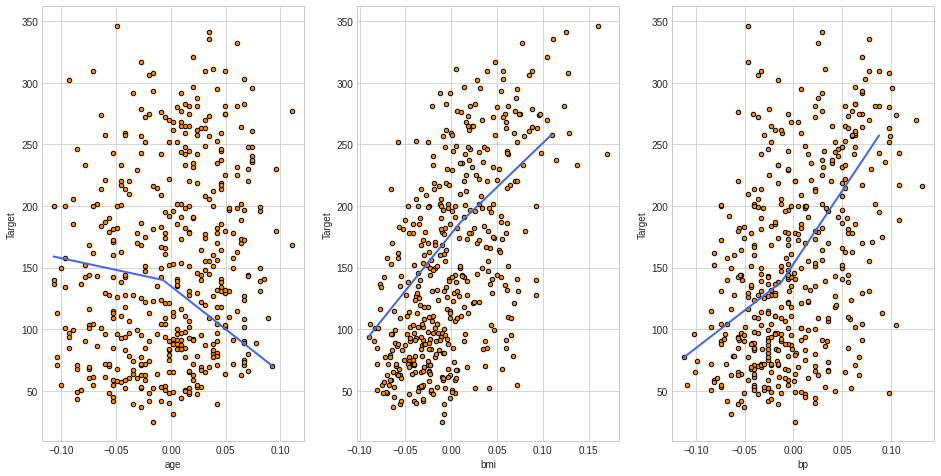

In [72]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,2,3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor()
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s = 20, edgecolors = 'k',
              c = 'darkorange', label = 'data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

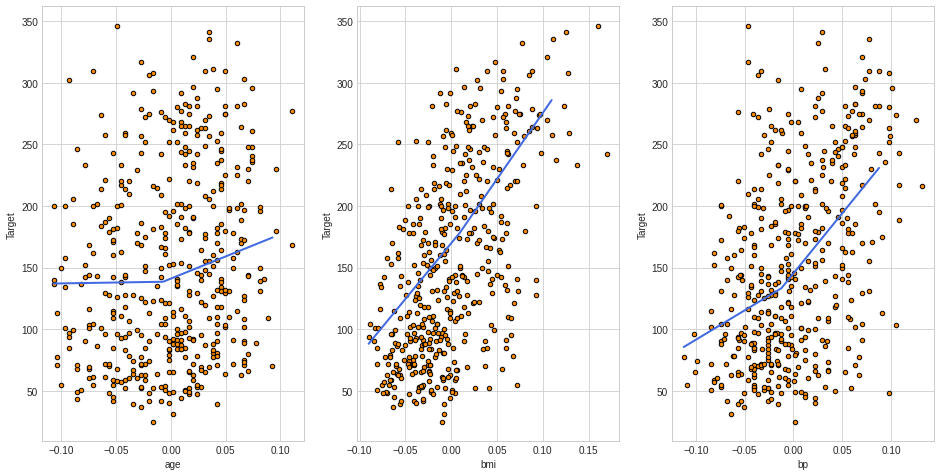

In [73]:
plt.figure(figsize = (16,8))

for pairidx, pair in enumerate([0,2,3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor(max_depth = 3) #깊이 한계 주기
  model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s = 20, edgecolors = 'k',
              c = 'darkorange', label = 'data')
  plt.plot(X_test, predict, color = 'royalblue', linewidth = 2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')